In [ ]:
import pandas as pd
import numpy as np
import h5py
import datetime
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

file_name = "data/210407/soc_210407.h5"
h5_file = h5py.File(file_name, "r")

# Contour plots of spectra with depth

Spectra acquired April 7, 2021; in backyard garden and/or soil canisters

In [2]:
insertions = list(h5_file['session001/cal001'].keys())
vis_waves = h5_file['session001/cal001'].attrs['spec1_wavelengths_vector'][:]
ftir_waves = h5_file['session001/cal001'].attrs['spec2_wavelengths_vector'][:]

# Visible light spectrometer

Transect in from backyard garden into the lawn.

In [3]:
descriptions = ['In Garden', 'At Edge of Garden', 'One Foot from Garden', 'Two Feet from Garden', 'Three Feet from Garden']

# FTIR Engine

Transect in from backyard garden into the lawn.

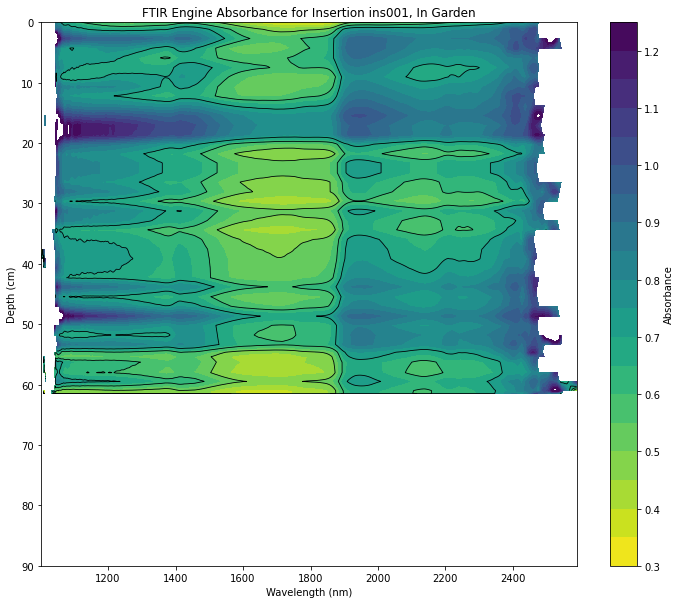

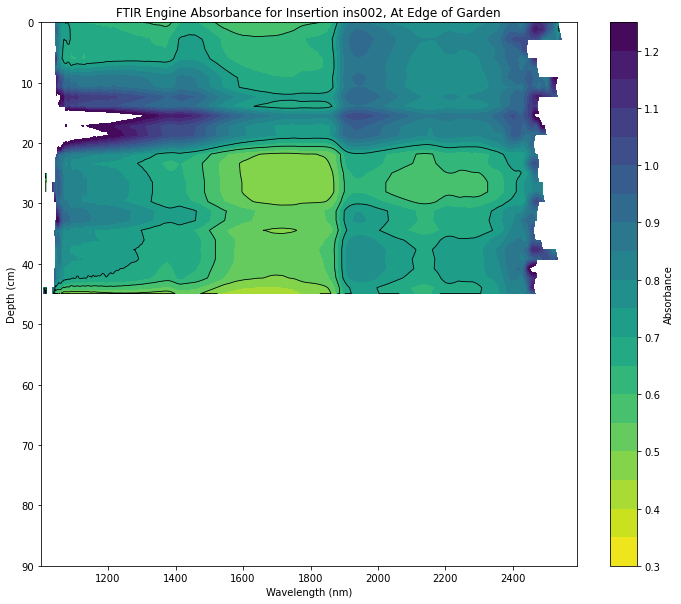

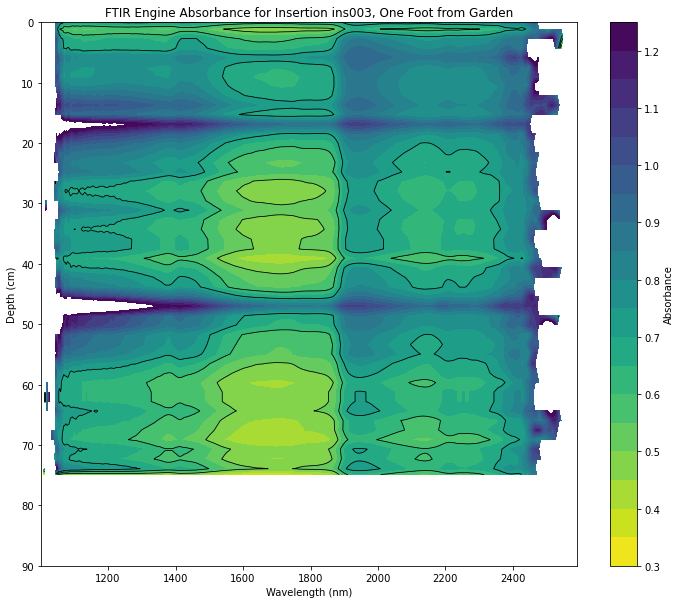

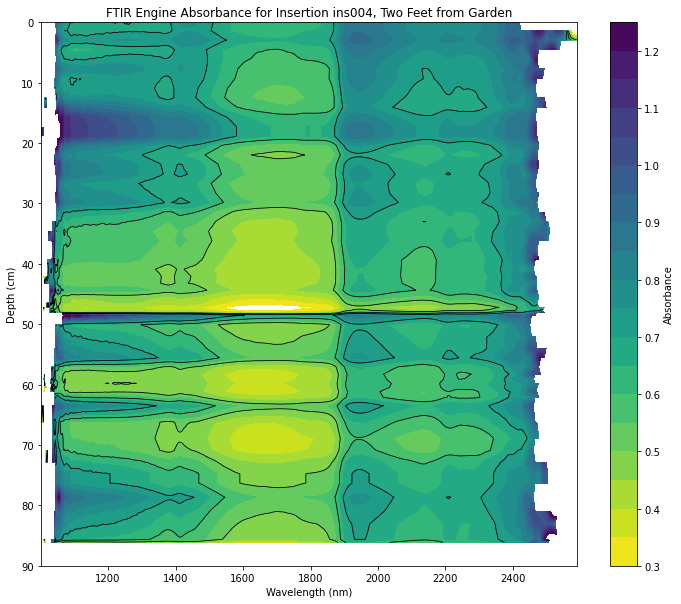

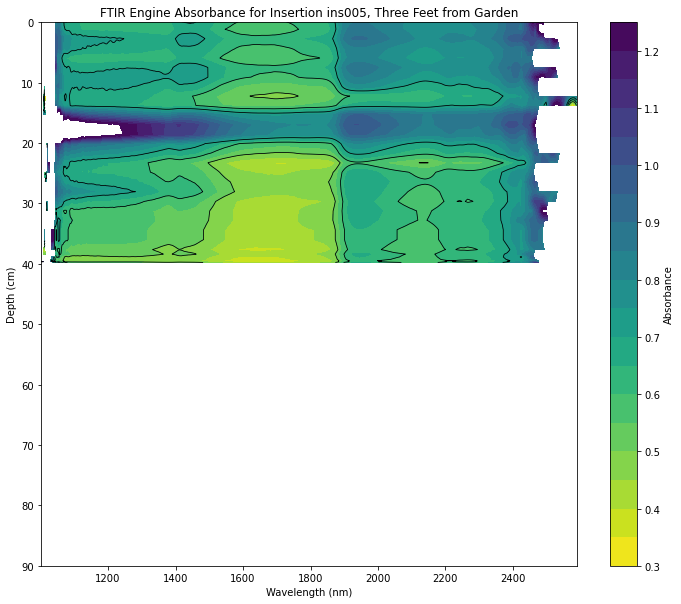

In [5]:
for insertion, description in zip(insertions, descriptions):
    ins_abs = h5_file[f'session001/cal001/{insertion}/derived/absorbance_depth'][:, 512:-2]
    ins_depths = h5_file[f'session001/cal001/{insertion}/derived/absorbance_depth'][:, -1]
    y = ins_depths
    x = ftir_waves
    z = savgol_filter(ins_abs, 15, 3, axis=1)
    X, Y = np.meshgrid(x, y)

    levels = np.arange(0.3, 1.3, 0.05)
    clevels = [0.50, 0.60, 0.70]
    fig, ax = plt.subplots(figsize = (12,10))

    ax.set_ylim(90, 0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_title(f"FTIR Engine Absorbance for Insertion {insertion}, {description}")
    cont = ax.contourf(X, Y, z, levels=levels, cmap='viridis_r')
    ax.contour(X, Y, z, levels=clevels, colors='k', linewidths=0.8)

    cbar = fig.colorbar(cont)
    cbar.ax.set_ylabel('Absorbance')

In [6]:
h5_file.close()
file_name = "data/210407/nirone_210407.h5"
h5_file = h5py.File(file_name, "r")
insertions = list(h5_file['session002/cal002'].keys())
waves = h5_file['session002/cal002'].attrs['spec1_wavelengths_vector'][:]

In [7]:
descriptions = ['In Lawn', 'In Lawn, Vibration Damped', 'Moist Spiked Canister',
               'Moist Spiked Canister, Vibration Damped', 'Dry Spiked Canister',
               'Dry Spiked Canister', 'Dry Spiked Canister, Vibration Damped']

# NIRONE

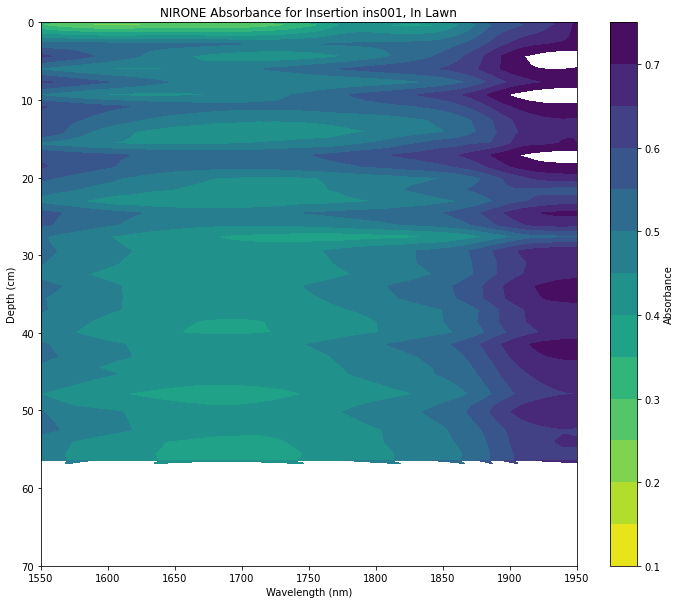

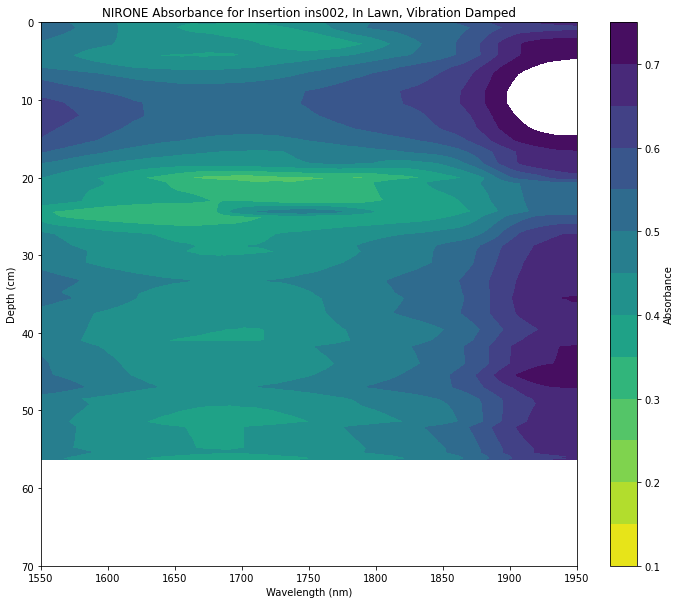

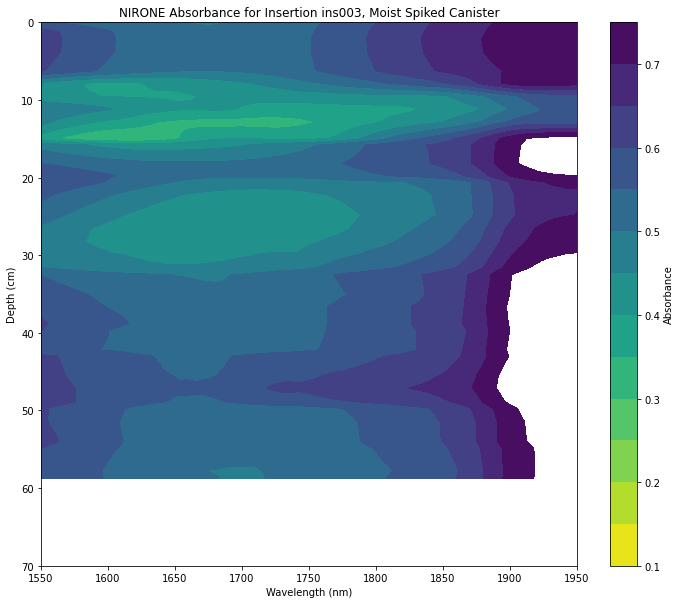

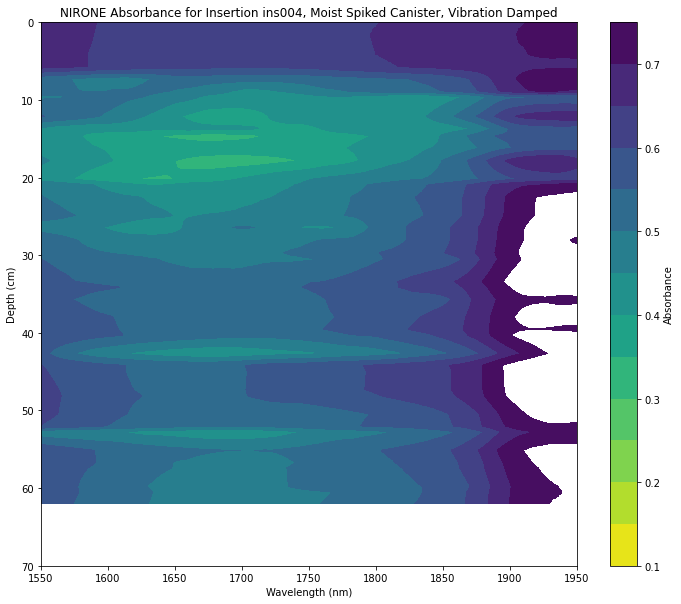

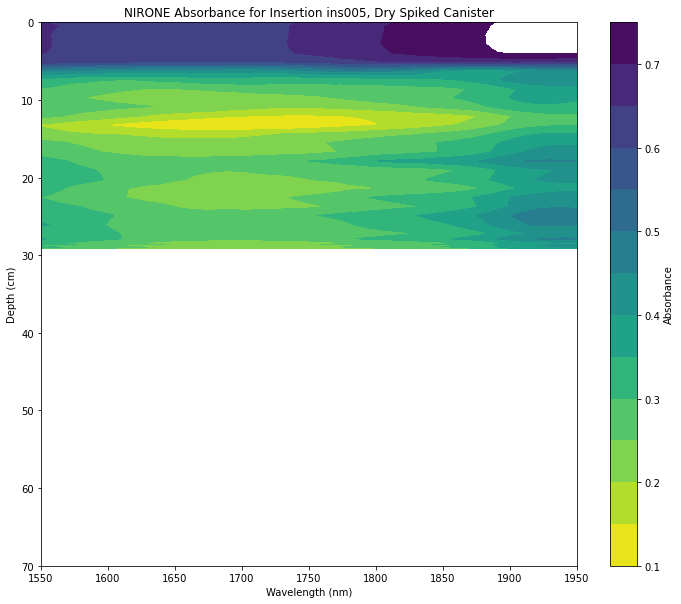

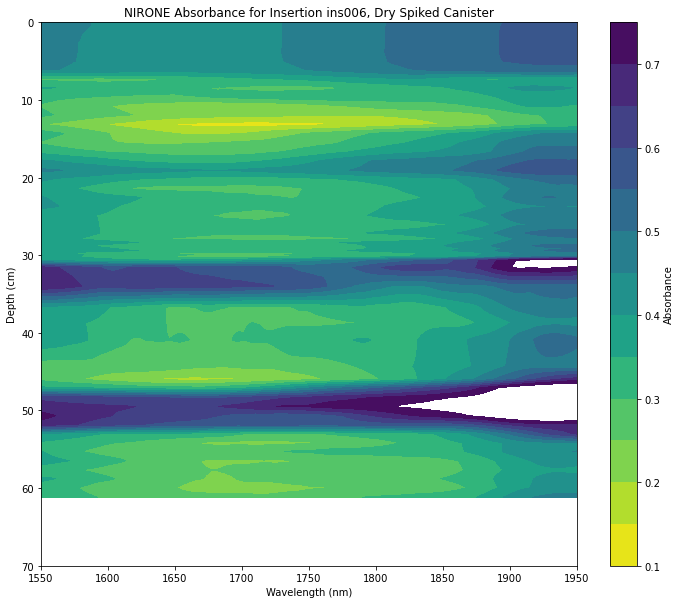

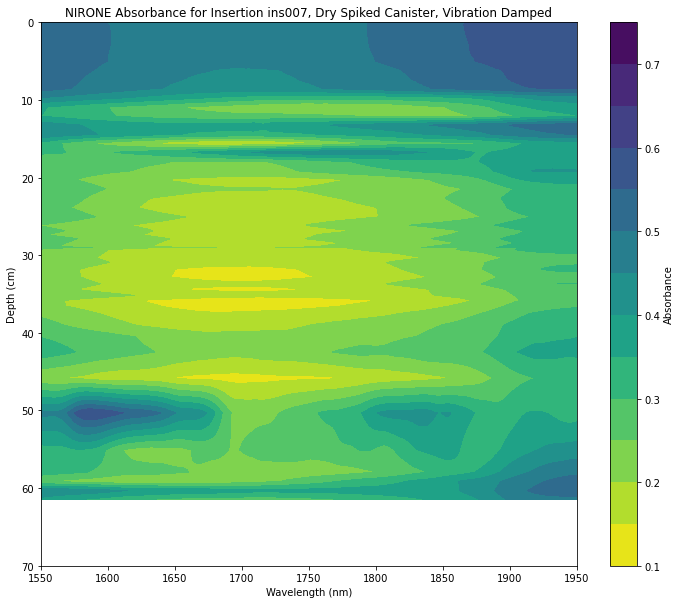

In [8]:
for insertion, description in zip(insertions, descriptions):
    ins_abs = h5_file[f'session002/cal002/{insertion}/spectrometer1/derived/absorbances'][:]
    ins_depths = h5_file[f'session002/cal002/{insertion}/derived/absorbance_depth'][:, -1]
    # amin = ins_abs[5:, :].min()
    # amax = ins_abs.max()
    amin = 0.1
    amax = 0.8
    
    
    y = ins_depths
    x = waves
    z = savgol_filter(ins_abs, 15, 3, axis=1)
    X, Y = np.meshgrid(x, y)
    levels = np.arange((amin - amin % 0.05), amax, 0.05)
    clevels = [0.20, 0.40, 0.60, 0.80]
    fig, ax = plt.subplots(figsize = (12,10))

    ax.set_ylim(70, 0)
    ax.set_ylabel("Depth (cm)")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_title(f"NIRONE Absorbance for Insertion {insertion}, {description}")
    cont = ax.contourf(X, Y, z, levels=levels, cmap='viridis_r')
    # ax.contour(X, Y, z, levels=clevels, colors='k', linewidths=0.8)

    cbar = fig.colorbar(cont)
    cbar.ax.set_ylabel('Absorbance')
